In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from keras.losses import MeanAbsolutePercentageError
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from numpy import loadtxt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#read file
read_file= pd.read_csv('final_data.txt', sep='	')
data=read_file
data=data.dropna()
data=data.astype(float)
data.columns=['Gc','j','c_old','soc_old','c_dot','soc_dot','d_dot']
df=data
#df
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
0,4.21,-0.3000,0.500000,0.500000,7.409167,0.600128,0.000000
1,4.21,-0.3000,0.507409,0.500600,3.954095,0.600128,0.000000
2,4.21,-0.3000,0.511363,0.501200,2.974950,0.600129,0.000000
3,4.21,-0.3000,0.514338,0.501800,2.501118,0.600128,0.000000
4,4.21,-0.3000,0.516839,0.502401,2.208906,0.600128,0.000000
...,...,...,...,...,...,...,...
12299,13.92,-0.0001,0.987004,0.987094,0.000201,0.000200,0.000086
12300,13.92,-0.0001,0.990530,0.990594,0.000202,0.000200,0.000087
12301,13.92,-0.0001,0.994061,0.994095,0.000202,0.000200,0.000089
12302,13.92,-0.0001,0.997600,0.997596,0.000202,0.000200,0.000093


In [3]:
#df.iloc[:,0]

In [4]:
#GC
print(min(df.iloc[:,0]))
print(max(df.iloc[:,0]))

4.21
13.92


In [5]:
#j
print(min(df.iloc[:,1]))
print(max(df.iloc[:,1]))

-0.3
-0.0001


In [6]:
#c_old
print(min(df.iloc[:,2]))
print(max(df.iloc[:,2]))

0.5
1.003217186101


In [7]:
#soc_old
print(min(df.iloc[:,3]))
print(max(df.iloc[:,3]))

0.5
1.0013275128919998


In [8]:
#c_dot
print(min(df.iloc[:,4]))
print(max(df.iloc[:,4]))

0.000199480131
7.409167018


In [9]:
#soc_dot
print(min(df.iloc[:,5]))
print(max(df.iloc[:,5]))

0.000199733153
0.600129


In [10]:
#d_dot
print(min(df.iloc[:,6]))
print(max(df.iloc[:,6]))

-3.3494799999999997e-06
1.549443


In [11]:
list(dict.fromkeys(df.iloc[:,0]))

[4.21, 5.97, 13.92]

In [12]:
#list(dict.fromkeys(df['j']))

In [13]:
#log J
df.iloc[:,1]=-np.log10( df.iloc[:,1]*-1)
#df['soc_dot']=-np.log10( df['soc_dot'])
#df['j']=-np.log10( df['j']*-1)  

In [14]:
#df=df[df['j']<3.3]
#df=df[df['j']>1]
#df
#-np.log10(0.008)

In [15]:
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
0,4.21,0.522879,0.500000,0.500000,7.409167,0.600128,0.000000
1,4.21,0.522879,0.507409,0.500600,3.954095,0.600128,0.000000
2,4.21,0.522879,0.511363,0.501200,2.974950,0.600129,0.000000
3,4.21,0.522879,0.514338,0.501800,2.501118,0.600128,0.000000
4,4.21,0.522879,0.516839,0.502401,2.208906,0.600128,0.000000
...,...,...,...,...,...,...,...
12299,13.92,4.000000,0.987004,0.987094,0.000201,0.000200,0.000086
12300,13.92,4.000000,0.990530,0.990594,0.000202,0.000200,0.000087
12301,13.92,4.000000,0.994061,0.994095,0.000202,0.000200,0.000089
12302,13.92,4.000000,0.997600,0.997596,0.000202,0.000200,0.000093


Text(0, 0.5, 'j')

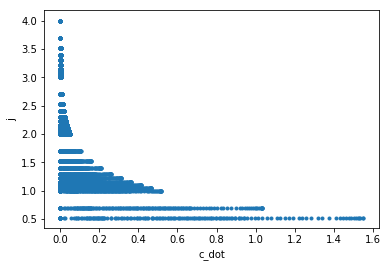

In [16]:
plt.scatter(df.iloc[:,6],df.iloc[:,1],marker='.')
plt.xlabel('c_dot')
plt.ylabel('j')
#plt.xlim(0,0.06)

In [17]:
#df=df[df['J']<-0.001]


In [18]:
#data_num = data.to_numpy()
#print(data_num[0,:])

In [19]:
#reduced_data = np.array([])
#reduced_data2 = np.array([])

#number = 0

# for i in data_num[:]:
    
#     if i[0] <= -0.25:
        
#         number += 1
#         #print(number)
#         reduced_data = np.append(reduced_data, i, axis = 0 )
#         #reduced_data.append(i)
    
#     else:
        #max
#         reduced_data2 = np.append(reduced_data2, i, axis = 0 )
        
    
# reduced_data = np.reshape(reduced_data, (int(reduced_data.shape[0]/3), 3))

# print(" number of elements for j < -0. 25 size is ",reduced_data.shape)


# reduced_data2 = np.reshape(reduced_data2, (int(reduced_data2.shape[0]/3), 3))

# print(" number of elements for j > -0. 25 size is ", reduced_data2.shape)

# print( "In total there are  " + str(int(reduced_data.shape[0]) + int(reduced_data2.shape[0])) + " samples")


In [20]:
#plt.hist(reduced_data[:,0])

In [21]:
#plt.hist(reduced_data2[:,0])


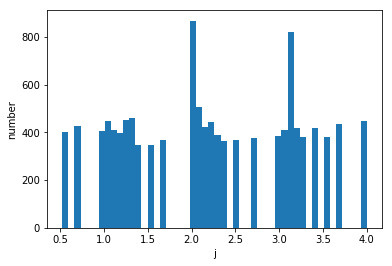

In [22]:
#j
plt.hist(df.iloc[:,1], bins=50)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)

plt.xlabel('j')
plt.ylabel('number')
plt.show()

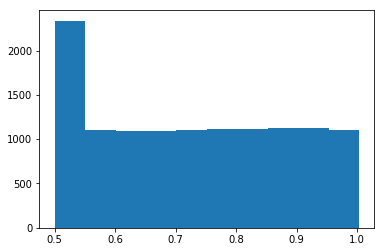

In [23]:
#c_old
plt.hist(df['c_old'])
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

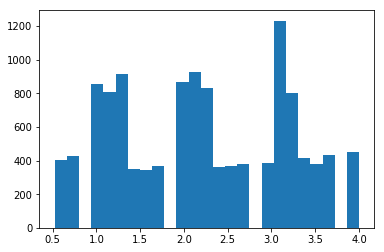

In [24]:
plt.hist(df['j'],bins=25)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

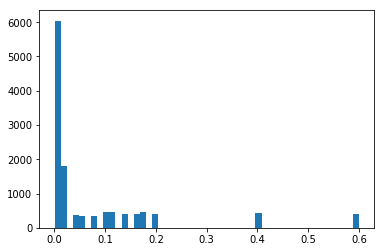

In [25]:
plt.hist(df['soc_dot'],bins=50)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

In [27]:
print(min(df['c_dot']))
print(max(df['c_dot']))

0.000199480131
7.409167018


In [29]:
df=df[(df['j']>1.6) & (df['j']<3.02)]
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
1343,4.21,1.69897,0.500000,0.500000,0.493929,0.040009,0.000000
1344,4.21,1.69897,0.500494,0.500040,0.263570,0.040008,-0.000000
1345,4.21,1.69897,0.500757,0.500080,0.192400,0.040008,0.000000
1346,4.21,1.69897,0.500988,0.500128,0.155810,0.040009,0.000000
1347,4.21,1.69897,0.501213,0.500186,0.132143,0.040008,-0.000000
...,...,...,...,...,...,...,...
11057,13.92,3.00000,0.985148,0.984958,0.002014,0.002000,0.000841
11058,13.92,3.00000,0.989381,0.989159,0.002018,0.002000,0.000864
11059,13.92,3.00000,0.993623,0.993360,0.002022,0.002000,0.000889
11060,13.92,3.00000,0.997876,0.997561,0.002028,0.002000,0.000927


## transformation

In [30]:
X=df.iloc[:,0:4]
y=df.iloc[:,4:7]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=40)

from sklearn.preprocessing import MinMaxScaler 
#scaler = StandardScaler()

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled_data=scaler.transform(X_train)
X_test_scaled_data=scaler.transform(X_test)

scaler_y = MinMaxScaler()

#scaler_y = StandardScaler()
scaler_y.fit(np.array(y_train))
y_train_scaled_data=scaler_y.transform(np.array(y_train))
y_test_scaled_data=scaler_y.transform(np.array(y_test))

In [31]:
model = Sequential()
model.add(Dense(1024*2, input_dim=4, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(3,activation='relu'))
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
history=model.fit(X_train_scaled_data, y_train_scaled_data, epochs=500, batch_size=80)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
3366/3366 [==============================] - 0s 127us/step - loss: 0.0160 - accuracy: 0.8440
Epoch 2/500
3366/3366 [==============================] - 0s 49us/step - loss: 0.0024 - accuracy: 0.7478
Epoch 3/500
3366/3366 [==============================] - 0s 49us/step - loss: 0.0019 - accuracy: 0.7763
Epoch 4/500
3366/3366 [==============================] - 0s 48us/step - loss: 0.0014 - accuracy: 0.8131
Epoch 5/500
3366/3366 [==============================] - 0s 54us/step - loss: 0.0010 - accuracy: 0.8518
Epoch 6/500
3366/3366 [==============================] - 0s 54us/step - loss: 9.4580e-04 - accuracy: 0.8675
Epoch 7/500
3366/3366 [==============================] - 0s 47us/step - loss: 7.6262e-04 - accuracy: 0.8975
Epoch 8/500
3366/3366 [==============================] - 0s 48us/step - loss: 7.0196e-04 - accuracy: 0.9106
Epoch 9/500
3366/3366 [==============================] - 0s 50us/step - loss: 6.0483e-04 - accuracy: 0.9091

3366/3366 [==============================] - 0s 53us/step - loss: 2.0373e-04 - accuracy: 0.9441
Epoch 146/500
3366/3366 [==============================] - 0s 72us/step - loss: 2.0897e-04 - accuracy: 0.9388
Epoch 147/500
3366/3366 [==============================] - 0s 54us/step - loss: 2.0704e-04 - accuracy: 0.9436
Epoch 148/500
3366/3366 [==============================] - 0s 54us/step - loss: 1.9294e-04 - accuracy: 0.9450
Epoch 149/500
3366/3366 [==============================] - 0s 67us/step - loss: 1.8127e-04 - accuracy: 0.9439
Epoch 150/500
3366/3366 [==============================] - 0s 58us/step - loss: 2.2149e-04 - accuracy: 0.9415
Epoch 151/500
3366/3366 [==============================] - 0s 57us/step - loss: 1.8342e-04 - accuracy: 0.9439
Epoch 152/500
3366/3366 [==============================] - 0s 43us/step - loss: 1.7578e-04 - accuracy: 0.9471
Epoch 153/500
3366/3366 [==============================] - 0s 44us/step - loss: 1.8645e-04 - accuracy: 0.9421
Epoch 154/500
3366/3366 

Epoch 218/500
3366/3366 [==============================] - 0s 49us/step - loss: 1.0642e-04 - accuracy: 0.9462
Epoch 219/500
3366/3366 [==============================] - 0s 60us/step - loss: 1.0151e-04 - accuracy: 0.9441
Epoch 220/500
3366/3366 [==============================] - ETA: 0s - loss: 3.2777e-04 - accuracy: 0.9426 ETA: 0s - loss: 4.2771e-04 - accuracy:  - 0s 57us/step - loss: 3.1071e-04 - accuracy: 0.9421
Epoch 221/500
3366/3366 [==============================] - 0s 73us/step - loss: 1.5376e-04 - accuracy: 0.9433
Epoch 222/500
3366/3366 [==============================] - 0s 75us/step - loss: 1.1979e-04 - accuracy: 0.9474
Epoch 223/500
3366/3366 [==============================] - 0s 69us/step - loss: 1.1286e-04 - accuracy: 0.9436
Epoch 224/500
3366/3366 [==============================] - 0s 69us/step - loss: 1.1466e-04 - accuracy: 0.9444
Epoch 225/500
3366/3366 [==============================] - 0s 75us/step - loss: 9.9116e-05 - accuracy: 0.9453
Epoch 226/500
3366/3366 [=======

3366/3366 [==============================] - 0s 53us/step - loss: 3.9434e-05 - accuracy: 0.9453
Epoch 364/500
3366/3366 [==============================] - 0s 57us/step - loss: 3.5603e-05 - accuracy: 0.9483
Epoch 365/500
3366/3366 [==============================] - 0s 53us/step - loss: 3.0902e-05 - accuracy: 0.9453
Epoch 366/500
3366/3366 [==============================] - 0s 63us/step - loss: 2.7468e-05 - accuracy: 0.9450
Epoch 367/500
3366/3366 [==============================] - 0s 87us/step - loss: 2.8584e-05 - accuracy: 0.9471
Epoch 368/500
3366/3366 [==============================] - 0s 59us/step - loss: 9.4058e-05 - accuracy: 0.9468
Epoch 369/500
3366/3366 [==============================] - 0s 64us/step - loss: 3.9393e-05 - accuracy: 0.9477
Epoch 370/500
3366/3366 [==============================] - 0s 57us/step - loss: 3.6182e-05 - accuracy: 0.9453
Epoch 371/500
3366/3366 [==============================] - 0s 57us/step - loss: 2.9013e-05 - accuracy: 0.9462
Epoch 372/500
3366/3366 

In [76]:
y_pred = model.predict(X_test_scaled_data)
y_pred_train= model.predict(X_train_scaled_data)
mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
print("Train R2 score MLP: {:.5f}".format(r2_score(y_pred_train, y_train_scaled_data)))
print("Test R2 score MLP: {:.5f}".format(r2_score(y_pred, y_test_scaled_data)))
print("MSE MLP: %.7f" % mseMLP)  
print("MAE MLP:", maeMLP)

Train R2 score MLP: 0.99680
Test R2 score MLP: 0.99415
MSE MLP: 0.0000121
MAE MLP: 0.0013979409129963316


In [77]:
filename = 'MediumJ-10nov.sav'
joblib.dump(model, filename)
#np.savetxt('history_small.txt',history)

['MediumJ-10nov.sav']

In [78]:
loss_history=history.history['loss']
accuracy_history=history.history['accuracy']
np.savetxt('history_loss_medium.txt',loss_history)
np.savetxt('history_accuracy_medium.txt',accuracy_history)

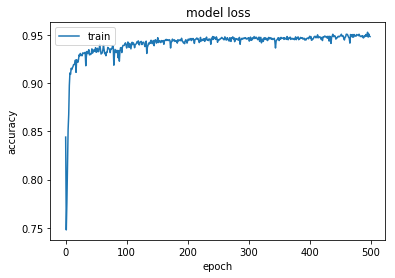

In [79]:
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

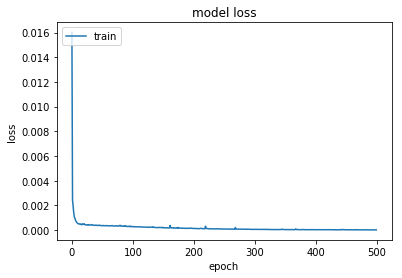

In [80]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
#import joblib
#model= joblib.load('keras_1024_200_v2.sav')

In [82]:
# # #load the saved model and test the performance
# import joblib
# M_s= joblib.load('MLP_150921_MaxMinScale_v1.sav')
# y_pred = M_s.predict(X_test_scaled_data)
# y_pred_train= M_s.predict(X_train_scaled_data)
# mseMLP = mean_squared_error(y_test_scaled_data, y_pred)



# print("Train R2 score MLP: {:.5f}".format(M_s.score(X_train_scaled_data, y_train_scaled_data)))


# print("Test R2 score MLP: {:.5f}".format(M_s.score(X_test_scaled_data, y_test_scaled_data)))



# print("MSE MLP: %.4f" % mseMLP)


# print("MAE MLP:", mean_absolute_error(y_test_scaled_data, y_pred))

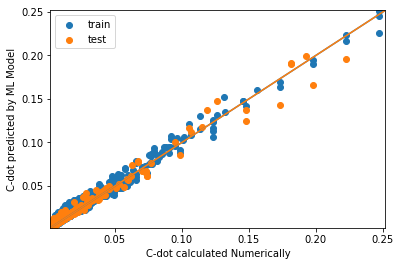

In [83]:
plt.scatter(np.array(y_train.iloc[:,0]),scaler_y.inverse_transform(y_pred_train)[:,0],label='train')
plt.scatter(np.array(y_test.iloc[:,0]),scaler_y.inverse_transform(y_pred)[:,0],label='test')
plt.xlabel('C-dot calculated Numerically')
plt.ylabel('C-dot predicted by ML Model')

lims = [y_test.iloc[:,0].min(), y_test.iloc[:,0].max()]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

_ = plt.plot(lims, lims)
plt.legend()

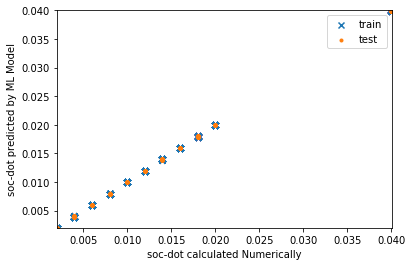

In [84]:
plt.scatter(np.array(y_train.iloc[:,1]),scaler_y.inverse_transform(y_pred_train)[:,1],marker='x',label='train')
plt.scatter(np.array(y_test.iloc[:,1]),scaler_y.inverse_transform(y_pred)[:,1],marker='.',label='test')
plt.xlabel('soc-dot calculated Numerically')
plt.ylabel('soc-dot predicted by ML Model')

lims = [y_test.iloc[:,1].min(), y_test.iloc[:,1].max()]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims,color='g')

#_ = plt.plot(lims, lims)
plt.legend()

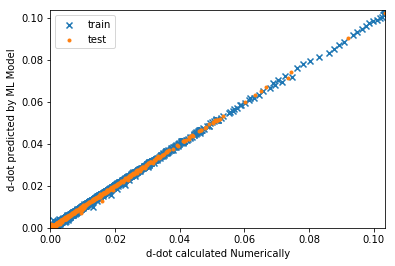

In [85]:
plt.scatter(np.array(y_train.iloc[:,2]),scaler_y.inverse_transform(y_pred_train)[:,2],marker='x',label='train')
plt.scatter(np.array(y_test.iloc[:,2]),scaler_y.inverse_transform(y_pred)[:,2],marker='.',label='test')
plt.xlabel('d-dot calculated Numerically')
plt.ylabel('d-dot predicted by ML Model')

lims = [y_test.iloc[:,2].min(), y_test.iloc[:,2].max()]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims,color='g')

#_ = plt.plot(lims, lims)
plt.legend()

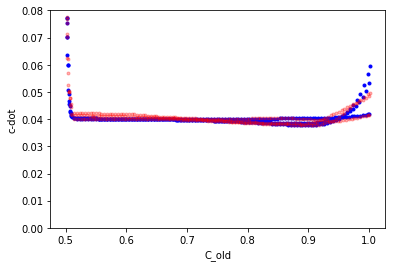

In [86]:
#read file
read_file= pd.read_csv('final_data.txt', sep='	')
data=read_file.iloc[:,:7]
data=data.dropna()
data=data.astype(float)
#data.columns=['J','C_old','soc_old','C_dot','soc_dot','d']
df=data
df.iloc[:,1]=-np.log10( df.iloc[:,1]*-1) 
#df.iloc[:,5]=-np.log10( df.iloc[:,1]) 
#df=data


df.loc[df.iloc[:,1] == 1.6989700043360187, 'test J match'] = 'True'
#df=df[df['Gc']==5.97]
#aa = df.loc[df['test J match'] == 'True']
fake_input = df.loc[df['test J match'] == 'True'].iloc[:,0:4]
fake_output_batch = df.loc[df['test J match'] == 'True'].iloc[:,4:7]


fake_input_scaled=scaler.transform(fake_input)           #scale fake input
predicted=model.predict(fake_input_scaled)
#predicted_Cdot= M11_s.predict(fake_input_scaled)[:,0]   #predict fake dataC 
#predicted_SOCdot= M11_s.predict(fake_input_scaled)[:,1]
#predicted_d= M11_s.predict(fake_input_scaled)[:,2]

#predict_j_fix_true=scaler_y.inverse_transform(predict_j_fix_scaled)  #scale back

plt.plot(fake_input.iloc[:,2],fake_output_batch.iloc[:,0], '.b')
plt.plot(fake_input.iloc[:,2],scaler_y.inverse_transform(predicted)[:,0], '.r', alpha=0.3)
plt.xlabel('C_old')
plt.ylabel('c-dot')
plt.ylim(0.0,0.08)
#plt.xlim(.4, 1.2)

# plt.figure()
plt.show()

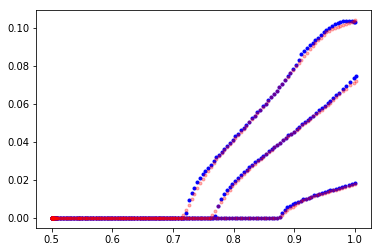

In [87]:
#read file
read_file= pd.read_csv('final_data.txt', sep='	')
data=read_file.iloc[:,:7]
data=data.dropna()
data=data.astype(float)
#data.columns=['J','C_old','soc_old','C_dot','soc_dot','d']
df=data
#j
df.iloc[:,1]=-np.log10( df.iloc[:,1]*-1) 
#soc_dot
#df.iloc[:,5]=-np.log10( df.iloc[:,5]) 
#df=data


df.loc[df.iloc[:,1] ==1.6989700043360187, 'test J match'] = 'True'
#df=df[df['Gc']==5.97]
#aa = df.loc[df['test J match'] == 'True']
fake_input = df.loc[df['test J match'] == 'True'].iloc[:,0:4]
fake_output_batch = df.loc[df['test J match'] == 'True'].iloc[:,4:7]


fake_input_scaled=scaler.transform(fake_input)           #scale fake input
predicted=model.predict(fake_input_scaled)
#predicted_Cdot= M11_s.predict(fake_input_scaled)[:,0]   #predict fake dataC 
#predicted_SOCdot= M11_s.predict(fake_input_scaled)[:,1]
#predicted_d= M11_s.predict(fake_input_scaled)[:,2]

#predict_j_fix_true=scaler_y.inverse_transform(predict_j_fix_scaled)  #scale back

plt.plot(fake_input.iloc[:,2],fake_output_batch.iloc[:,2], '.b')
plt.plot(fake_input.iloc[:,2],scaler_y.inverse_transform(predicted)[:,2], '.r', alpha=0.3)
#plt.xlabel('d_old')
#plt.ylabel('c-dot')
#plt.ylim(0.00,0.00023)
# #plt.xlim(.4, .8)

# plt.figure()
plt.show()

In [88]:
#J
list(dict.fromkeys(df.iloc[:,1]))

[0.5228787452803376,
 0.6989700043360187,
 1.0,
 1.0457574905606752,
 1.0969100130080565,
 1.154901959985743,
 1.2218487496163564,
 1.3010299956639813,
 1.3979400086720375,
 1.5228787452803376,
 1.6989700043360187,
 2.0,
 2.0457574905606752,
 2.0969100130080562,
 2.154901959985743,
 2.221848749616356,
 2.3010299956639813,
 2.3979400086720375,
 2.5228787452803374,
 2.6989700043360187,
 3.0,
 3.0457574905606752,
 3.0969100130080562,
 3.154901959985743,
 3.2218487496163566,
 3.3010299956639813,
 3.3979400086720375,
 3.5228787452803374,
 3.6989700043360187,
 4.0]

In [89]:
np.savetxt('scaled_x1_101121.txt',X_train_scaled_data[:,0])
np.savetxt('scaled_x2_101121.txt',X_train_scaled_data[:,1])
np.savetxt('scaled_x3_101121.txt',X_train_scaled_data[:,2])
np.savetxt('scaled_x4_101121.txt',X_train_scaled_data[:,3])
np.savetxt('scaled_y1_101121.txt',y_train_scaled_data[:,0])
np.savetxt('scaled_y2_101121.txt',y_train_scaled_data[:,1])
np.savetxt('scaled_y3_101121.txt',y_train_scaled_data[:,2])

np.savetxt('x1_1011211.txt',X_train.iloc[:,0])
np.savetxt('x2_101121.txt',X_train.iloc[:,1])
np.savetxt('x3_101121.txt',X_train.iloc[:,2])
np.savetxt('x4_101121.txt',X_train.iloc[:,3])
np.savetxt('y1_101121.txt',y_train.iloc[:,0])
np.savetxt('y2_101121.txt',y_train.iloc[:,1])
np.savetxt('y3_101121.txt',y_train.iloc[:,2])

np.savetxt('weight1_row1_101121.txt',model.layers[0].get_weights()[0][0,:])
np.savetxt('weight1_row2_101121.txt',model.layers[0].get_weights()[0][1,:])
np.savetxt('weight1_row3_101121.txt',model.layers[0].get_weights()[0][2,:])
np.savetxt('weight1_row4_101121.txt',model.layers[0].get_weights()[0][3,:])

np.savetxt('weight2_c1_101121.txt',model.layers[1].get_weights()[0][:,0])
np.savetxt('weight2_c2_101121.txt',model.layers[1].get_weights()[0][:,1])
np.savetxt('weight2_c3_101121.txt',model.layers[1].get_weights()[0][:,2])

np.savetxt('bias1_101121.txt',model.layers[0].get_weights()[1])
np.savetxt('bias2_101121_.txt',model.layers[1].get_weights()[1])